# Car Evaluation Dataset

In [1]:
# Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
df = pd.read_csv("car_evaluation.csv",header = None)

In [3]:
# Checking the head of the data
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
# Checking the shape of the data
df.shape

(1728, 7)

In [5]:
# Checking the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
# Decribing the data
df.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


## Data Cleaning

In [7]:
# Changinng names of the columns
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [8]:
# Checking the head of the data again
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
# Printing value counts of all the categorical variables
for col in col_names:
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [10]:
# We have the target variable as class
# So lets explore the variable
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [11]:
# Checking null values in the variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

- There are no null values in any of the variables

## Declaring feature and target variable


In [12]:
X = df.drop(['class'],axis = 1)
y = df['class']

## Splitting data into train and test sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.67,random_state=42)

In [15]:
# Checking shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

## Feature Engineering 

In [16]:
# Encoding categorical variables

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [18]:
import category_encoders as ce

In [19]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [20]:
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [21]:
# Checking head of the X_train data again
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


- As we can see the categorical variables are now all turned into category

## Decision Tree Classifier using Gini index

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf_gini = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, random_state= 0)

In [24]:
# Fitting the model
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [25]:
# Predicting test results
y_pred_gini = clf_gini.predict(X_test)

In [26]:
# Checking accuracy
from sklearn.metrics  import accuracy_score
acc = accuracy_score(y_test,y_pred_gini)
print(f'accuracy score wit gini index: {acc}')

accuracy score wit gini index: 0.8021015761821366


In [27]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8021


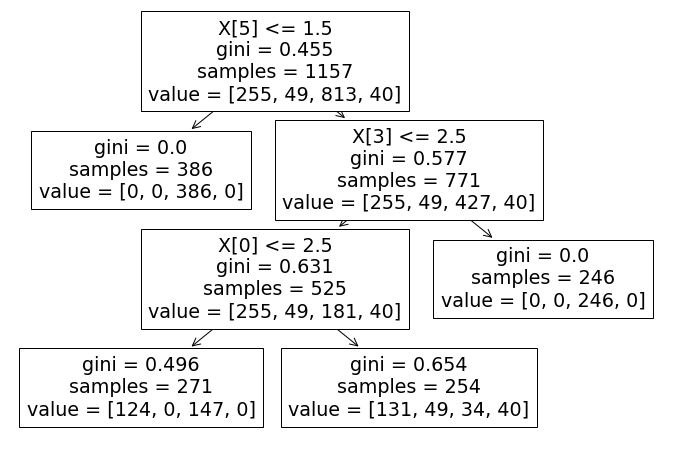

In [46]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

plt.show()

In [29]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

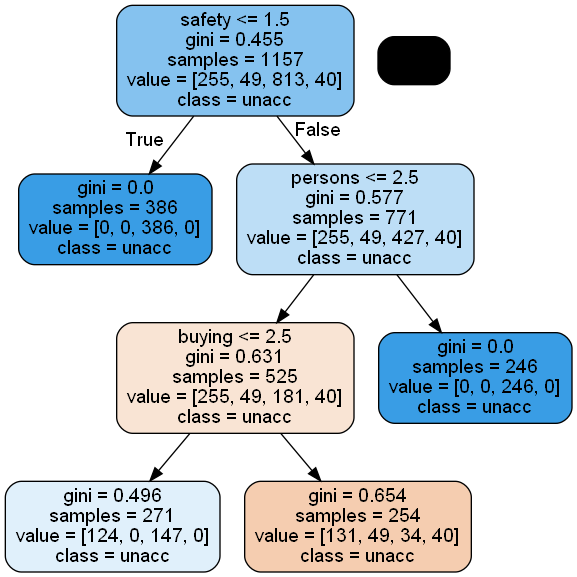

In [30]:
dot_data =StringIO()
graph= export_graphviz(clf_gini, out_file=dot_data, filled= True,
               feature_names= X_train.columns,
               class_names= y_train, rounded= True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Decsion Tree using Entropy

In [31]:
clf_ent = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)

In [33]:
# Fitting the model
clf_ent.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [34]:
# Predicting test results
y_pred_ent = clf_ent.predict(X_test)

In [36]:
# Checking accuracy
acc = accuracy_score(y_test,y_pred_ent)
print(f'accuracy score wit entropy index: {acc}')

accuracy score wit entropy index: 0.8021015761821366


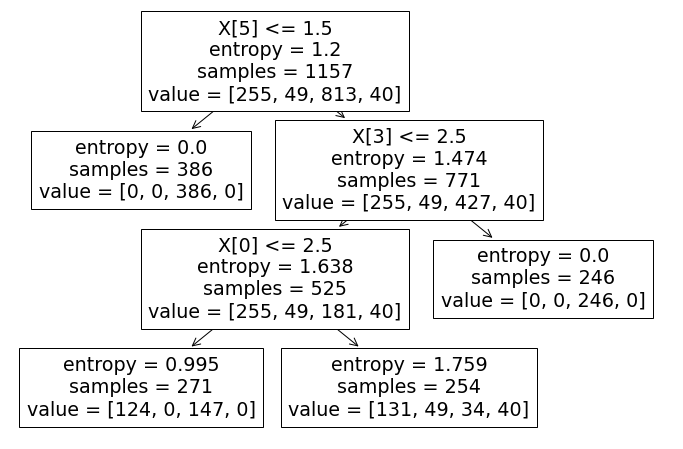

In [45]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_ent.fit(X_train, y_train))

plt.show()

In [38]:
## Visualizing the decision tree using Graphviz
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [40]:
dot_data = StringIO()
graph = export_graphviz(clf_ent, out_file= dot_data, filled = True,
                        feature_names= X_train.columns,
                        class_names = y_train, rounded = True)


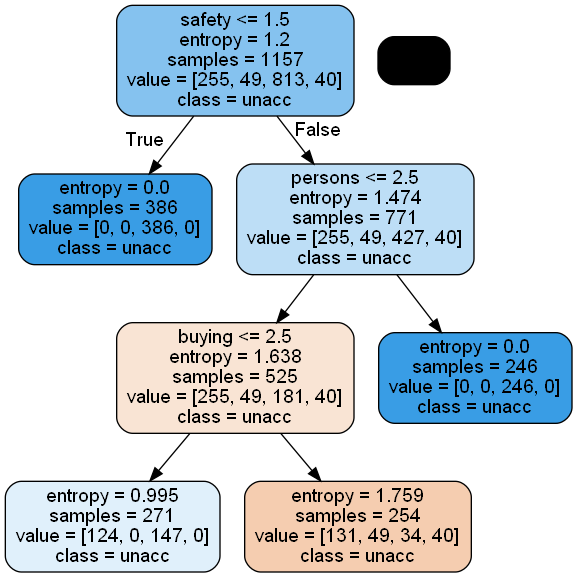

In [41]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ent)
cm

array([[ 73,   0,  56,   0],
       [ 20,   0,   0,   0],
       [ 12,   0, 385,   0],
       [ 25,   0,   0,   0]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ent))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



## Conclusion

- 